# Project Introduction

This project simulates a hypothetical scenario of a Fitness Coach supplying us with a client's annual nutrition information (as a Microsoft Excel file).

The coach has asked us to prepare this data with the eventual goal of creating a "2021 Nutrition Year in Review" Viz Dashboard.

They want to use as much recorded information as possible and also to create a few extra columns described as...
1. "Weekly Average Weight" : The average weight of each week (every 7 days starting from the first recorded date). Rounded to one decimal place.
2. "Net Weight Change" : The difference between the current and previous weeks average weights. Rounded to two decimal places.
3. "Calorie Adherence" : The result of dividing actual calories and goal calories per day. On a scale of 0 to 10.
4. "Protein Adherence" : The result of dividing actual protein and goal protein per day. On a scale of 0 to 10.
5. "Fat Adherence" : The result of dividing actual fats and goal fats per day. On a scale of 0 to 10.
6. "Carbs Adherence" : The result of dividing actual carbs and goal carbs per day. On a scale of 0 to 10.
7. "Calorie Difference": The kcal difference between actual calories and goal calories.
8. "Protein Difference" : The gram difference between actual protein and goal protein.
9. "Fats Difference" : The gram difference between actual fats and goal fats.
10. "Carbs Difference": The gram difference between actual carbs and goal carbs.

# General Plan

To accomplish this goal we will need to perform two major steps...
1. Data Cleaning
    * Identify and handle duplicate rows
    * Identify and handle missing data
    * Resolve inconsistent formatting
    * Recast column data types if necessary
2. Feature Engineering
    * Use the existing data to create all additional columns specified by the coach.

# Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading our raw data
raw_data = pd.read_excel("2021 Nutrition Data (RAW).xlsx")

In [3]:
# Making a copy of our raw data so we can clean without worries
copy_data = raw_data.copy(deep=True)

In [4]:
# Taking a look at the head of our raw data DataFrame

copy_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN


Before going further, there seems to be a discrepancy with our column names. We will keep that in mind as we continue.

In [5]:
# Getting a general overview of our raw data

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   372 non-null    object 
 2   Unnamed: 2   345 non-null    object 
 3   Unnamed: 3   364 non-null    object 
 4   Unnamed: 4   372 non-null    object 
 5   Unnamed: 5   364 non-null    object 
 6   Unnamed: 6   372 non-null    object 
 7   Unnamed: 7   364 non-null    object 
 8   Unnamed: 8   372 non-null    object 
 9   Unnamed: 9   364 non-null    object 
 10  Unnamed: 10  372 non-null    object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  98 non-null     object 
dtypes: float64(1), object(12)
memory usage: 37.9+ KB


After calling .info(), we can confirm a few initial suspicions about our raw data.
1. The column names don't seem to be right (it appears that our correct column names are located in the first data row).
2. The head of our data frame shows us that most of our columns contain numeric data but their respective column datatypes are listed as 'object'. (To visualize these columns properly in the future, we'll need to convert them to the appropriate data types. Recasting to numeric data types will also let us learn more about the data through the .describe() method.)
3. We have some missing values in our data (our data frame has a total of 372 rows but not all columns have a non-null count of 372). To fill these correctly (if necessary) we will need the columns containing numeric data to have the correct data types.

Let's deal with these issues one at a time.

# Cleaning our Data Frame

## Renaming Columns

In [6]:
# Let's fix our column names first

# Setting the column names to the values of the first row
copy_data.columns = copy_data.iloc[0].values

In [7]:
# Checking to see if it worked
copy_data.head()

# It worked so now we can remove the first row since we no longer need it.

,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN


Our columns have been renamed successfully but that first row is still there. We should remove that now.

In [8]:
# Dropping the first row since we made those into column names
copy_data = copy_data.drop(index=0)

In [9]:
# Quickly looking at our new DataFrame

copy_data.head() # Important columns are named correctly

,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
5,NaN,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [10]:
# General info about our new columns

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 1 to 371
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nan                 0 non-null      float64
 1   Date                371 non-null    object 
 2   Daily Weight (lbs)  344 non-null    object 
 3   Calorie Actual      363 non-null    object 
 4   Calorie Goal        371 non-null    object 
 5   Protein Actual      363 non-null    object 
 6   Protein Goal        371 non-null    object 
 7   Fat Actual          363 non-null    object 
 8   Fat Goal            371 non-null    object 
 9   Carb Actual         363 non-null    object 
 10  Carb Goal           371 non-null    object 
 11  Activity            97 non-null     object 
 12  Duration (minutes)  97 non-null     object 
dtypes: float64(1), object(12)
memory usage: 40.6+ KB


## Dropping Unwanted Columns

If we look at the first column above, named "NaN", we can see that it has a Non-Null Count of 0. This means that the entirety of that column contains missing data. This is likely due to a formatting error in our imported Excel file that carried on into our data frame. 

A column of all missing data serves no purpose to us in relation to our end-goal of visualization (to be safe we want to double check with the coach to confirm that this is infact a useless column - and it is). Therefore, we can remove that column (but keep everything else as they are metrics we do want to visualize).

In [11]:
copy_data.columns

Index([                 nan,               'Date', 'Daily Weight (lbs)',
           'Calorie Actual',       'Calorie Goal',     'Protein Actual',
             'Protein Goal',         'Fat Actual',           'Fat Goal',
              'Carb Actual',          'Carb Goal',           'Activity',
       'Duration (minutes)'],
      dtype='object')

In [12]:
# Dropping the "NaN" column

# copy_data.drop(columns='nan') --> This doesn't work because NaN isn't the real name of our column, it is actually a missing
# value that was propogated up when we renamed our columns as the data in our first row. Since the first column was originally
# empty, the new column name became NaN or 'Not a Number'.

In [13]:
# Dropping the "NaN" column with index slicing
copy_data = copy_data.loc[:,'Date':] # grabbing every row of our data frame and all columns from 'Date' onwards 

In [14]:
copy_data.head() # Looks better

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
5,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [15]:
copy_data.info()

# As we can see, the "NaN" column is no longer there and we have a total of 371 rows (the original 372 rows minus the first row
# that we deleted)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 1 to 371
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                371 non-null    object
 1   Daily Weight (lbs)  344 non-null    object
 2   Calorie Actual      363 non-null    object
 3   Calorie Goal        371 non-null    object
 4   Protein Actual      363 non-null    object
 5   Protein Goal        371 non-null    object
 6   Fat Actual          363 non-null    object
 7   Fat Goal            371 non-null    object
 8   Carb Actual         363 non-null    object
 9   Carb Goal           371 non-null    object
 10  Activity            97 non-null     object
 11  Duration (minutes)  97 non-null     object
dtypes: object(12)
memory usage: 37.7+ KB


In [16]:
# Let's quickly reset our index numbers to be from 0 to 370 since we removed that first row.
copy_data = copy_data.reset_index(drop=True)

In [17]:
copy_data

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
1,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
2,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
3,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
4,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
366,2021-12-29 00:00:00,143.6,2132,2190,137,115,62,49,261,322,NaN,NaN
367,2021-12-30 00:00:00,144.2,2087,2190,172,115,70,49,202,322,NaN,NaN
368,2021-12-31 00:00:00,143.6,1988,2190,93,115,62,49,270,322,NaN,NaN
369,2022-01-01 00:00:00,145.6,2127,2190,145,115,66,49,225,322,Walk,30


Our data frame looks much better now (with our columns renamed, redundant first row and empty column removed, and indexes renumbered). Now we can move on to cleaning out actual data!

In [18]:
# Before this let's quickly call .describe() to take a look at a few general statistics for our newly recasted numeric columns
copy_data.describe()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
count,371,344.0,363,371,363,371,363,371,363,371,97,97
unique,371,79.0,300,27,122,14,79,12,135,26,1,5
top,2021-11-20 00:00:00,143.6,1559,1577,131,165,38,44,144,168,Walk,30
freq,1,14.0,3,65,9,82,13,78,9,65,97,73


# Cleaning our Data

## Identifying and Handling Duplicate Data

Multiple rows that contain the exact same data serve no purpose to us. Once again we would consult with our coach here to confirm that any duplicates can be safely removed. Since this nutrition data is essentially a client recording multiple data points over time, it wouldn't make sense for two rows to contain the exact same data (every row should have a distinct value in the "Date" column).

In [19]:
# Checking for duplicate rows

copy_data.duplicated(keep='first') # for every row in our data frame, this method denotes duplicate rows with 'True'

# It looks like we have no duplicate rows

0      False
1      False
2      False
3      False
4      False
       ...  
366    False
367    False
368    False
369    False
370    False
Length: 371, dtype: bool

In [20]:
copy_data.duplicated(keep='first').value_counts()

# As we can see here, we have 371 counts of False and 0 counts of True. This means our data contains NO duplicate rows.

False    371
dtype: int64

Hypothetically, if our data did contain duplicate rows that we wanted to remove, we could execute:

```copy_data = copy_data.drop_duplicates(keep='first')```

which would remove all of them for us automatically (except the first instance).

## Identifying Missing Data

If we eventually want to visualize this data (with the hopes of providing beneficial insights to our coach and their client), we should consider the case of missing data. Similarly to how we removed that "NaN" column before since it contained all missing data (and therefore served no purpose to us), it would be helpful to quantify how much missing data is contained in our other columns as well.

If certain columns contain a large amount of missing data ("large" in this case would be based on the context of this situation and would require discussion with our coach), we might decide to remove those columns as well since they don't provide much beneficial insight for future decisions. 

If we keep the columns with missing data we can either... <br>
(1) leave the data as-is and generate holes in our final visualizations (not necessarily a bad thing at this stage and would be up to our coach's preference) or <br>
(2) fill the missing data by implementing various methods. (Since many of our columns contain numeric data, filling our missing data may require methods that necessitate numeric input so we would need to recast our columns to the appropriate data types first).

For now, let's identify how much missing data each of our columns have and see if there are any columns that can be reasonably removed altogether. After that, we can recast the data types of our remaining columns and implement methods to fill their missing data.

In [21]:
# Finding the number of missing values per column

print("Column\t\tMissing Value Count")
copy_data.isnull().sum().sort_values(ascending=False)

# We can see that 8 columns contain missing values

Column		Missing Value Count


Activity              274
Duration (minutes)    274
Daily Weight (lbs)     27
Calorie Actual          8
Protein Actual          8
Fat Actual              8
Carb Actual             8
Date                    0
Calorie Goal            0
Protein Goal            0
Fat Goal                0
Carb Goal               0
dtype: int64

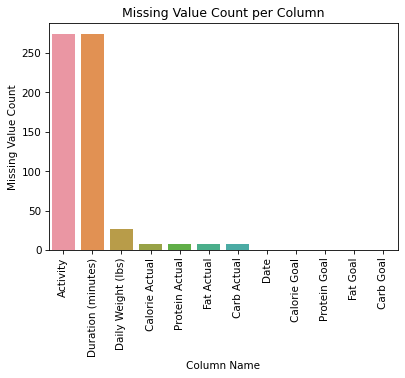

In [22]:
# Visualizing total missing values per column

# Defining our x and y series
missing_data_counts = copy_data.isnull().sum().sort_values(ascending=False)
x = missing_data_counts.index
y = missing_data_counts.values

# Creating our visualization

plt.figure(dpi=75)
sns.barplot(x=x, y=y)
plt.title('Missing Value Count per Column')
plt.xlabel('Column Name')
plt.ylabel('Missing Value Count')
plt.xticks(rotation=90)

plt.show()

In [23]:
# It might be more useful to represent the missing value counts as percentages of the total number of rows in our DataFrame

# Converting the missing value counts to percentages between 0 and 100
missing_data_percent = pd.Series(
    index = missing_data_counts.index,
    data = missing_data_counts.values/371*100)

In [24]:
print("Column\t\tMissing Value Percent")

missing_data_percent

Column		Missing Value Percent


Activity              73.854447
Duration (minutes)    73.854447
Daily Weight (lbs)     7.277628
Calorie Actual         2.156334
Protein Actual         2.156334
Fat Actual             2.156334
Carb Actual            2.156334
Date                   0.000000
Calorie Goal           0.000000
Protein Goal           0.000000
Fat Goal               0.000000
Carb Goal              0.000000
dtype: float64

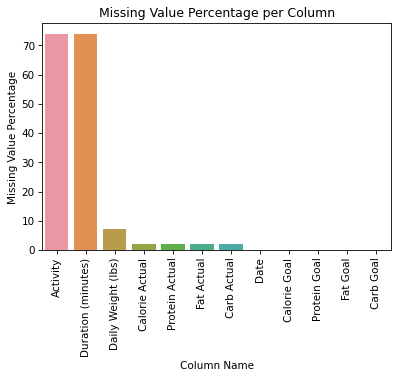

In [25]:
# Visualizing the percentage of missing values per column

plt.figure(dpi=75)
sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values)
plt.title('Missing Value Percentage per Column')
plt.xlabel('Column Name')
plt.ylabel('Missing Value Percentage')
plt.xticks(rotation=90)

plt.show()

We can see that two columns have extremely high missing value percentages (>70%). Following those, we have one column with around 7% missing data and 4 columns with around 2% missing data. Our remaining columns have no missing data.

### Decision: Do We Drop Columns?

The two columns that would be most likely to be dropped are "Activity" and "Duration (minutes)", each having over 70% missing values. However, after consulting with our coach, they explained that these columns provide valuable information about the quantity of additional cardio their client performed each day. "Activity" describes the type of cardio the client did while "Duration (minutes)" describes how long the client did that type of cardio for. Additional daily cardio does have an effect on one's overall energy expenditure therefore the coach desires we keep these columns in. Missing values in these columns don't mean that the client forgot to record that day but rather that they just did no additional cardio for that day.

All other columns contain too valuable information for us to drop. Therefore, we will not be dropping any of our remaining columns.

Since we are not dropping any more columns, our next task is to try filling the missing data where applicable. Since the data contained in our columns are mostly numeric, we will recast their column data types first so we can apply the appropriate methods for filling missing data later on.

## Data Type Recasting

In [26]:
# Viewing our data frame head and current data types again

copy_data.head()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
1,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
2,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
3,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
4,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [27]:
copy_data.dtypes

Date                  object
Daily Weight (lbs)    object
Calorie Actual        object
Calorie Goal          object
Protein Actual        object
Protein Goal          object
Fat Actual            object
Fat Goal              object
Carb Actual           object
Carb Goal             object
Activity              object
Duration (minutes)    object
dtype: object

In [28]:
# Date: object --> DateTime
copy_data['Date'] = pd.to_datetime(copy_data['Date'])
copy_data['Date'].head()

0   2020-12-28
1   2020-12-29
2   2020-12-30
3   2020-12-31
4   2021-01-01
Name: Date, dtype: datetime64[ns]

In [29]:
# Daily Weight (lbs) : object --> float
copy_data['Daily Weight (lbs)'] = copy_data['Daily Weight (lbs)'].astype('float64')
copy_data['Daily Weight (lbs)'].head()

0    171.4
1    170.8
2    172.4
3    171.4
4    173.2
Name: Daily Weight (lbs), dtype: float64

**Note:** Originally, I intended to recast the Actual and Goal columns for Calorie, Protein, Fat, and Carbs to Integer data types however, this version of Pandas does not support the existence of missing data in columns with int data types. Therefore, we will convert them to floats for now, handle the missing data using numeric methods, then convert them to ints if we deem necessary.

In [30]:
# Calorie Actual/Goal, Protein Actual/Goal, Fat Actual/Goal, Carb Actual/Goal : object --> float
copy_data['Calorie Actual'] = copy_data['Calorie Actual'].astype('float64')
copy_data['Calorie Goal'] = copy_data['Calorie Goal'].astype('float64')

copy_data['Protein Actual'] = copy_data['Protein Actual'].astype('float64')
copy_data['Protein Goal'] = copy_data['Protein Goal'].astype('float64')

copy_data['Fat Actual'] = copy_data['Fat Actual'].astype('float64')
copy_data['Fat Goal'] = copy_data['Fat Goal'].astype('float64')

copy_data['Carb Actual'] = copy_data['Carb Actual'].astype('float64')
copy_data['Carb Goal'] = copy_data['Carb Goal'].astype('float64')  

In [31]:
# Since the 'Activity' column is used to provide the name of the type of cardio done on a certain day, we can keep this as the
# 'object' data type.

copy_data['Activity'].value_counts()

Walk    97
Name: Activity, dtype: int64

In [32]:
# Duration (minutes) : object --> float (once we resolve the missing data we can convert this to int)
copy_data['Duration (minutes)'] = copy_data['Duration (minutes)'].astype('float64')

In [33]:
# Inspecting the head of our converted Data Frame
copy_data.head() # Looks slightly different but all necessary information seems to have been retained

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,NaN,NaN
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,NaN,NaN
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,NaN,NaN
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,NaN,NaN
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,NaN,NaN


In [34]:
copy_data.info() # columns containing numeric data have been dtype recasted and we are now ready to handle missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                371 non-null    datetime64[ns]
 1   Daily Weight (lbs)  344 non-null    float64       
 2   Calorie Actual      363 non-null    float64       
 3   Calorie Goal        371 non-null    float64       
 4   Protein Actual      363 non-null    float64       
 5   Protein Goal        371 non-null    float64       
 6   Fat Actual          363 non-null    float64       
 7   Fat Goal            371 non-null    float64       
 8   Carb Actual         363 non-null    float64       
 9   Carb Goal           371 non-null    float64       
 10  Activity            97 non-null     object        
 11  Duration (minutes)  97 non-null     float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 34.9+ KB


## Handling Missing Data

In [35]:
# As we prepare to handle the missing data in each column, we will create a method to plot the missing data percentage

def plot_missing_percent():
    
    # Creating our Series of ColumnName:MissingPercent pairs
    missing_data_counts = copy_data.isnull().sum().sort_values(ascending=False)
    missing_data_percent = pd.Series(
        index = missing_data_counts.index,
        data = missing_data_counts.values/len(copy_data)*100)
    
    # Filtering columns that have no missing data
    missing_data_percent = missing_data_percent[missing_data_percent>0]
    
    
    # If we still have columns with missing data, create our plot
    if len(missing_data_percent>0):
        plt.figure()
        sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values)
        plt.title('Missing Value Percentage per Column')
        plt.xlabel('Column Name')
        plt.ylabel('Missing Value Percentage')
        plt.xticks(rotation=90)
        plt.show()
    
    # Else, print a message saying "All missing data has been handled."
    else:
        print("All missing data has been handled.")

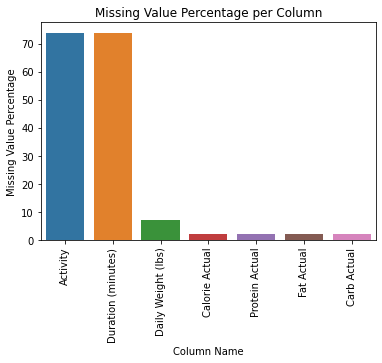

In [36]:
# Testing our method 

plot_missing_percent()

### Activity

In [37]:
# I suspect a missing value in this column corresponds to a missing value in the Duration column as well but let's double check
# to make sure

# Searching for any rows where 'Activity' is null while 'Duration (minutes)' is not null
copy_data[(copy_data['Activity'].isnull()) & (copy_data['Duration (minutes)'].isnull()==False)] # no rows returned

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)


In [38]:
# Searching for any rows where 'Duration (minutes)' is null while 'Activity' is not null
copy_data[(copy_data['Activity'].isnull()==False) & (copy_data['Duration (minutes)'].isnull())] # no rows returned

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)


This means that every time the 'Activity' column has a missing value, the 'Duration (minutes)' column also has a missing value (and vice versa).

In [39]:
# How many distinct values do we have in the 'Activity' column?
copy_data['Activity'].value_counts()

Walk    97
Name: Activity, dtype: int64

In [40]:
# It looks like we only have one distinct value in the 'Activity' column which is 'Walk'. This means that the existence of a
# non-null value in this column just tells us if the client walked that day or not. 

# Option 1: Replace all null values in the 'Activity' column with 'Walk'. We can treat null values in 'Activity' and 'Duration'
# as the client walking for 0 minutes that day. However, if we want to convey this information, it might make more sense to drop
# the 'Activity' column completely and rename 'Duration (minutes)' to something more descriptive for what it conveys such as
# 'Walk Duration (minutes)'. This seems reasonable but the 'Duration (minutes)' column was originally intended to track
# total duration of daily cardio, not just walking. 

# Option 2: To preserve the integrity of the data we were given as much as possible, we can replace null values in the 
# 'Activity' column with a simple string 'None' indicating no additional cardio was performed on that day. This would be
# accompanied with a duration of 0 minutes since we already saw that the two columns are linked in that way.

# We will go with Option 2 as it is the most straight-forward way of retaining the information conveyed while still filling the
# missing data.

In [41]:
copy_data['Activity'] = copy_data['Activity'].fillna('None')

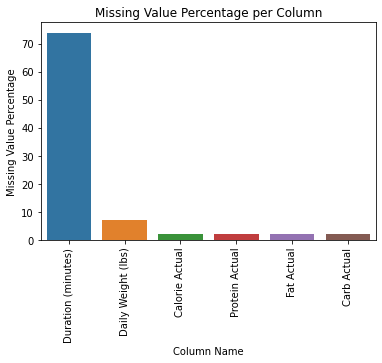

In [42]:
# Seeing if our missing data visualization changed

plot_missing_percent() # As we can see, the 'Activity' column no longer here

### Duration (minutes)

In [43]:
# A missing value in this column implies that no additional cardio was performed on that day (outside of normal activity)
# Therefore, we can fill these missing values with 0.

copy_data['Duration (minutes)'] = copy_data['Duration (minutes)'].fillna(0)

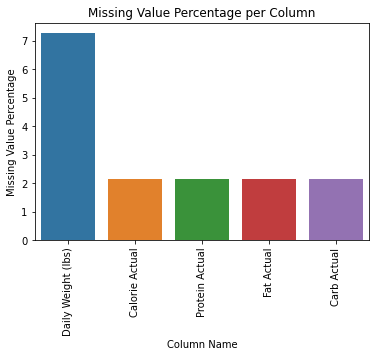

In [44]:
plot_missing_percent()

### Daily Weight (lbs)

In [45]:
# Identifying the number of rows in this column containing missing data
copy_data['Daily Weight (lbs)'].isnull().sum()

27

In [46]:
# Inspecting a few of these rows
copy_data[copy_data['Daily Weight (lbs)'].isnull()].head(10)

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
21,2021-01-18,NaN,1328.0,1850.0,88.0,175.0,31.0,50.0,168.0,175.0,None,0.0
36,2021-02-02,NaN,1672.0,1730.0,179.0,183.0,31.0,46.0,165.0,146.0,None,0.0
62,2021-02-28,NaN,995.0,1730.0,43.0,183.0,42.0,46.0,113.0,146.0,None,0.0
64,2021-03-02,NaN,1255.0,1730.0,72.0,183.0,36.0,46.0,204.0,146.0,None,0.0
65,2021-03-03,NaN,888.0,1730.0,29.0,183.0,28.0,46.0,128.0,146.0,None,0.0
69,2021-03-07,NaN,1448.0,1441.0,138.0,170.0,52.0,21.0,107.0,143.0,None,0.0
103,2021-04-10,NaN,1379.0,1577.0,79.0,170.0,25.0,25.0,208.0,168.0,None,0.0
106,2021-04-13,NaN,1517.0,1577.0,134.0,170.0,33.0,25.0,170.0,168.0,Walk,30.0
112,2021-04-19,NaN,1561.0,1577.0,160.0,170.0,27.0,25.0,150.0,168.0,Walk,30.0
134,2021-05-11,NaN,1616.0,1577.0,150.0,170.0,31.0,25.0,180.0,168.0,None,0.0


**Decision:**

We don't want to substitute these values with 0 because that would imply the client weighed 0 lbs on those days (which is not true). Furthermore, we can't substitute a single value into all of these missing data points because it is unlikely the client weighed the same on those days (due to weight change over time and natural daily weight fluctuation).

This means we need to use a mathematical method to extrapolate what these values most likely would have been.

**Option 1:** We can simply leave these values as missing data which would result in holes in our final visualization. This may be acceptable but since this column contains numeric data, it might be possible to approximate these values using a mathematical method.

**Option 2:** We can use propogation to fill these values. The method which would accomplish this is:  
```pd.DataFrame.fillna() ``` with _method_ = 'bfill' or 'ffill'.  
A forward-fill would populate these values with their closest recorded previous weights while a back-fill would populate them with the closest weight recorded after those dates. It is reasonable to expect that one's bodyweight would stay relatively the same within a short timespan but it is highly unlikely that their weight would stay _exactly_ the same even in consecutive days (due to daily hormonal fluctuation, water accumulation, stress, etc.)

**Option 3:** We can use interpolation to fill these values. The method that would accomplish this is:  
```pd.DataFrame.interpolate()``` with _method_ = 'linear', 'quadratic', 'cubic' etc.  
This method would use recorded values surrounding our missing data and attempt to estimate those values as they would fit in a mathematical function. Linear or Polynomial interpolation would succeed in filling our missing values but bodyweight tends to fluctuate up and down a few pounds between consecutive days and it is highly unlikely that many consecutive missing bodyweights would follow such an organized relationship. Additionally, filling these missing values with interpolation would cause our feature engineered 'Weekly Bodyweight' column to be inaccurate.

**Option 4:** Since we know we want to engineer a new column of Weekly Average Bodyweight, we could populate any missing values with the average body weight of that week. This may not be completely accurate but it preserves the long-term trend of bodyweight change over time and retains the calculated average weekly weight which the coach wants to visualize. The main problem with this approach is that the selection of those 7 days is rather arbitrary (starting the week on Sunday would result in a different average weight than starting it on Monday). Unfortunately, this seems like the best option we have given our circumstances and at the very least, if we remain consistent in what day we 'start' the week on, the overall long-term trend of the client's bodyweight will be preserved.

**We will choose Option 4 to fill the missing values in the 'Daily Weight (lbs)' column.**

This means we will wait until we have feature engineered our Average Weekly Weight column then use those values to fill the missing values in this column.

### Calorie Actual

In [47]:
# Inspecting the rows containing missing values in this column

copy_data[copy_data['Calorie Actual'].isnull()]

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
48,2021-02-14,170.8,NaN,1730.0,NaN,183.0,NaN,46.0,NaN,146.0,None,0.0
164,2021-06-10,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
165,2021-06-11,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
166,2021-06-12,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
167,2021-06-13,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
208,2021-07-24,NaN,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,None,0.0
209,2021-07-25,NaN,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,Walk,30.0
216,2021-08-01,151.6,NaN,1318.0,NaN,165.0,NaN,18.0,NaN,124.0,Walk,15.0


Interestingly enough, it seems that whenever the 'Calorie Actual' column contains missing values, so too do the 'Protein Actual', 'Fat Actual', and 'Carb Actual' columns. As we calculated before, all of these columns should contain 8 missing values. Let's double check this.

In [48]:
# The section of our data frame where Calorie Actual contains missing values (only including the four 'Actual' columns)

copy_data[['Calorie Actual', 'Protein Actual', 'Fat Actual', 'Carb Actual']][copy_data['Calorie Actual'].isnull()]

,Calorie Actual,Protein Actual,Fat Actual,Carb Actual
48,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN


In [49]:
# How many rows does this slice of our data frame have?

len(copy_data[['Calorie Actual', 'Protein Actual', 'Fat Actual', 'Carb Actual']][copy_data['Calorie Actual'].isnull()])

8

This confirms that all our remaining missing data (in our 'Actual' columns) are located in the exact same rows. As these rows only make up about 2% of our total data frame, it wouldn't be unreasonable to consider dropping these rows to get rid of all the missing data at once.

However, after inspecting those rows more carefully, we see that the values of those rows in the respective 'Goal' columns varied and some of those rows contained Daily Bodyweight data as well as data on additional cardio performed (which we didn't have much of as seen before). This information seems too valuable to lose (at least right now). 

**Decision:**

Since these columns contain numeric data, we can attempt to use mathematical methods to fill the missing data similar to our Daily Bodyweight column.  
<br>
Once again, we wouldn't be able to fill these with 0 nor the same exact values as it is highly unlikely that the client ate the exact same amount of food across those days (especially since the calorie goals changed too). Propogation probably wouldn't work either for the same reasons. We wouldn't be able to use interpolation as food consumption probably doesn't adhere to a neat linear or polynomial function over time.
<br>
Similar to our decision for the 'Daily Bodyweight (lbs)' column, it seems that using some kind of weekly average would probably be best. (If we inspect the original Excel file, we can see that the nutrition Goals change on a weekly basis but typically remain the same within those weeks. Conveniently, our missing values are never present in consecutive chunks of 7 or more rows so there will at least be some recorded nutrition 'Actual' data within those weeks that we can potentially use to approximate our missing values. Doing so would not alter the long-term nutrition trend either).
<br>

Planning: Use a function to mark every Monday row. Partition on Monday, find the average daily weight of that week, and populate a new column with that number. Then use bfill to propagate that to the previous days.

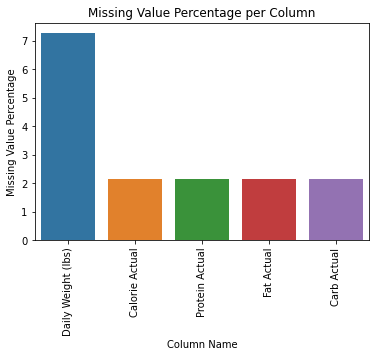

In [50]:
# Our final visualization of missing data (for now)
plot_missing_percent()

# After Feature Engineering, we will come back and fill these remaining columns

# Feature Engineering

### Weekly Average Weight Change

Note: If I were using SQL to complete this project, I would prefer to use a PARTITION here, as our goal is to separate 7-day chunks of rows starting on Mondays. However, it doesn't seem like Python's Pandas module has a simple ```.partition()``` method as I would hope, so we'll have to get creative and look deeper into the [Pandas documentation](https://pandas.pydata.org/docs/) to find a way to accomplish our task. Let's do it!

In [51]:
## Since we want to separate these chunks based on DateTime data, we might be able to use Pandas .Grouper() method

# First let us create a temporary column called "Day Name" so we can make sure we group the dates correctly (Monday start)

copy_data['Day Name'] = copy_data['Date'].dt.day_name()
copy_data[['Date','Day Name']].head(10) # a quick lookup using a calendar confirms that the method worked

,Date,Day Name
0,2020-12-28,Monday
1,2020-12-29,Tuesday
2,2020-12-30,Wednesday
3,2020-12-31,Thursday
4,2021-01-01,Friday
5,2021-01-02,Saturday
6,2021-01-03,Sunday
7,2021-01-04,Monday
8,2021-01-05,Tuesday
9,2021-01-06,Wednesday


In [52]:
# We want our 7-day partitions to start on Monday and end on Sunday

copy_data[['Date','Day Name','Daily Weight (lbs)']]\
    .groupby(pd.Grouper(key="Date", freq="W"))\
    .agg({
        'Day Name' : [lambda x : "{} --> {}".format(x.iloc[0],x.iloc[-1])], 
        'Daily Weight (lbs)' : ['mean']
    })\
    .reset_index()\
    .head(10) # putting this here after writing the below comments to reduce final display size

# In the data frame returned by this code execution we have the 'Day Name' column displaying how the dates are separated.
# The first day is the start of each section while the second day is the end of each section. Since every value in this column
# is 'Monday --> Sunday', we know the partionining worked as intended.

# For our 'Daily Weight (lbs)' column, we see the calculated average of the recorded daily weights within each section.

# The 'Date' column displays the last date in each partition.

# It looks like we were able to calculate the average weights successfully. Now we just need to transfer these averages to our
# copy_data DataFrame. We can merge this DataFrame with copy_data on those dates to record the average weight for each week 
# (on only the last day) and then possibly use backfill propagation to just copy those weights onto the other days of the 
# same weeks (if we want).

,Date,Day Name,Daily Weight (lbs)
,,<lambda>,mean
0,2021-01-03,Monday --> Sunday,172.000000
1,2021-01-10,Monday --> Sunday,171.971429
2,2021-01-17,Monday --> Sunday,171.714286
3,2021-01-24,Monday --> Sunday,172.133333
4,2021-01-31,Monday --> Sunday,171.085714
5,2021-02-07,Monday --> Sunday,171.200000
6,2021-02-14,Monday --> Sunday,170.114286
7,2021-02-21,Monday --> Sunday,169.314286
8,2021-02-28,Monday --> Sunday,168.100000


In [53]:
# Let's save the result from above as a separate DataFrame so we can merge with copy_data

# We don't need that Day Name column in this df so we can keep that out and clean up the aggregation by just using .mean()
# We'll also make this a deep copy so the returned DataFrame is a completely new one and not just a view of copy_data

partitioned_weight_df = copy_data[['Date','Daily Weight (lbs)']]\
    .copy(deep=True)\
    .groupby(pd.Grouper(key="Date", freq="W"))\
    .mean()\
    .reset_index()\
    .rename(columns={"Daily Weight (lbs)": "Average Weekly Weight (lbs)"}) # renaming this column to avoid confusion

partitioned_weight_df.head()

,Date,Average Weekly Weight (lbs)
0,2021-01-03,172.000000
1,2021-01-10,171.971429
2,2021-01-17,171.714286
3,2021-01-24,172.133333
4,2021-01-31,171.085714


In [54]:
pd.set_option('display.max_rows',None)

In [55]:
# Now all we need to do is merge the newly created partitioned_weight_df and our main DataFrame (copy_data)

copy_data = copy_data.merge(partitioned_weight_df, how='left', on='Date')

In [56]:
# Taking a quick look at the first 14 rows of our copy_data DataFrame to see if our merge worked
copy_data.head(14)

# As expected, we see two numeric values in our last column on the last day of each week.

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Day Name,Average Weekly Weight (lbs)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,Monday,NaN
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,Tuesday,NaN
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,Wednesday,NaN
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,Thursday,NaN
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,Friday,NaN
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,Saturday,NaN
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,Sunday,172.000000
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,Monday,NaN
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,Tuesday,NaN
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,Wednesday,NaN


Success! We'll hold off on doing a backfill propagation just yet because if we think ahead, creating our 'Net Weight Change (lbs)' column will follow an extremely similar process as the one we just did. Once we create that column, we can propagate both at the same time (if we want).

### Net Weight Change

For this column, we need to calculate the difference between the 'Average Weekly Weight (lbs)' of every week with the one prior. Luckily, we just created that partitioned DataFrame above so we can just add one more column with a rolling difference calculation and merge it to copy_data all the same. Let's do it!

In [57]:
# Checking out the partition DataFrame we just created
partitioned_weight_df.head()

,Date,Average Weekly Weight (lbs)
0,2021-01-03,172.000000
1,2021-01-10,171.971429
2,2021-01-17,171.714286
3,2021-01-24,172.133333
4,2021-01-31,171.085714


In [58]:
# We'll perform an aggregate function on 'Average Weekly Weight (lbs)' which calculates the rolling
# difference of the average weight of one week and the one prior.


# Testing our implementation of .rolling()
partitioned_weight_df.set_index('Date')\
    .rolling(window=2, min_periods=2)\
    .agg({
        'Average Weekly Weight (lbs)' : (lambda x : round(x.iloc[1]-x.iloc[0] , 2))
    })\
    .reset_index()\
    .rename(columns={'Average Weekly Weight (lbs)' : 'Net Weight Change (lbs)'})\
    .head() # adding this after checking if it worked to reduce display size

,Date,Net Weight Change (lbs)
0,2021-01-03,NaN
1,2021-01-10,-0.03
2,2021-01-17,-0.26
3,2021-01-24,0.42
4,2021-01-31,-1.05


In [59]:
# Saving this Data Frame as another deep copy just to be on the safe side.
partitioned_net_df = partitioned_weight_df.set_index('Date')\
    .copy(deep=True)\
    .rolling(window=2, min_periods=2)\
    .agg({
        'Average Weekly Weight (lbs)' : (lambda x : round(x.iloc[1]-x.iloc[0],3))
    })\
    .reset_index()\
    .rename(columns={'Average Weekly Weight (lbs)' : 'Net Weight Change (lbs)'})

partitioned_net_df.head()

,Date,Net Weight Change (lbs)
0,2021-01-03,NaN
1,2021-01-10,-0.029
2,2021-01-17,-0.257
3,2021-01-24,0.419
4,2021-01-31,-1.048


In [60]:
# Finally we can merge with copy_data

copy_data = copy_data.merge(partitioned_net_df, how='left', on='Date')

In [61]:
copy_data.head(14) # Look's good

# As expected, the first numeric value in our Average Weekly Weight column does not have a corresponding value in the
# Net Weight Change column (because there was no previous value to calculate a difference). However, the second average value
# in row 13 does have a corresponding value for Net Weight Change meaning our merge worked.

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Day Name,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,Monday,NaN,NaN
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,Tuesday,NaN,NaN
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,Wednesday,NaN,NaN
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,Thursday,NaN,NaN
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,Friday,NaN,NaN
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,Saturday,NaN,NaN
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,Sunday,172.000000,NaN
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,Monday,NaN,NaN
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,Tuesday,NaN,NaN
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,Wednesday,NaN,NaN


### Calorie Adherence

The result of dividing Calorie Actual and Calorie Goal (converted to a scale of 0 to 10+).

In [62]:
copy_data['Calorie Adherence'] = (copy_data['Calorie Actual'] / copy_data['Calorie Goal'] * 10).round(decimals=1)

copy_data[['Date','Calorie Actual','Calorie Goal','Calorie Adherence']].head()

,Date,Calorie Actual,Calorie Goal,Calorie Adherence
0,2020-12-28,2011.0,2050.0,9.8
1,2020-12-29,1897.0,2050.0,9.3
2,2020-12-30,2064.0,2050.0,10.1
3,2020-12-31,2178.0,2050.0,10.6
4,2021-01-01,2015.0,2050.0,9.8


### Calorie Difference (kcals)

The difference calculated by subtracting Calorie Goal from Calorie Actual.

In [63]:
copy_data['Calorie Difference (kcals)'] = copy_data['Calorie Actual'] - copy_data['Calorie Goal']
copy_data[['Date','Calorie Actual','Calorie Goal','Calorie Difference (kcals)']].head()

,Date,Calorie Actual,Calorie Goal,Calorie Difference (kcals)
0,2020-12-28,2011.0,2050.0,-39.0
1,2020-12-29,1897.0,2050.0,-153.0
2,2020-12-30,2064.0,2050.0,14.0
3,2020-12-31,2178.0,2050.0,128.0
4,2021-01-01,2015.0,2050.0,-35.0


### Protein Adherence

The result of dividing Protein Actual and Protein Goal (converted to a scale of 0 to 10+).

In [64]:
copy_data['Protein Adherence'] = (copy_data['Protein Actual'] / copy_data['Protein Goal'] * 10).round(decimals=1)
copy_data[['Date','Protein Actual','Protein Goal','Protein Adherence']].head()

,Date,Protein Actual,Protein Goal,Protein Adherence
0,2020-12-28,171.0,200.0,8.6
1,2020-12-29,188.0,200.0,9.4
2,2020-12-30,177.0,200.0,8.8
3,2020-12-31,119.0,200.0,5.9
4,2021-01-01,179.0,200.0,9.0


### Protein Difference (grams)

The difference calculated by subtracting Protein Goal from Protein Actual.

In [65]:
copy_data['Protein Difference (grams)'] = copy_data['Protein Actual'] - copy_data['Protein Goal']
copy_data[['Date','Protein Actual','Protein Goal','Protein Difference (grams)']].head()

,Date,Protein Actual,Protein Goal,Protein Difference (grams)
0,2020-12-28,171.0,200.0,-29.0
1,2020-12-29,188.0,200.0,-12.0
2,2020-12-30,177.0,200.0,-23.0
3,2020-12-31,119.0,200.0,-81.0
4,2021-01-01,179.0,200.0,-21.0


### Fats Adherence

The result of dividing Fat Actual and Fat Goal (converted to a scale of 0 to 10+).

In [66]:
copy_data['Fat Adherence'] = (copy_data['Fat Actual'] / copy_data['Fat Goal'] * 10).round(decimals=1)
copy_data[['Date','Fat Actual','Fat Goal','Fat Adherence']].head()

,Date,Fat Actual,Fat Goal,Fat Adherence
0,2020-12-28,36.0,50.0,7.2
1,2020-12-29,32.0,50.0,6.4
2,2020-12-30,77.0,50.0,15.4
3,2020-12-31,79.0,50.0,15.8
4,2021-01-01,31.0,50.0,6.2


### Fats Difference (grams)

The difference calculated by subtracting Fat Goal from Fat Actual.

In [67]:
copy_data['Fat Difference (grams)'] = copy_data['Fat Actual'] - copy_data['Fat Goal']
copy_data[['Date','Fat Actual','Fat Goal','Fat Difference (grams)']].head()

,Date,Fat Actual,Fat Goal,Fat Difference (grams)
0,2020-12-28,36.0,50.0,-14.0
1,2020-12-29,32.0,50.0,-18.0
2,2020-12-30,77.0,50.0,27.0
3,2020-12-31,79.0,50.0,29.0
4,2021-01-01,31.0,50.0,-19.0


### Carbs Adherence

The result of dividing Carb Actual and Carb Goal (converted to a scale of 0 to 10+).

In [68]:
copy_data['Carb Adherence'] = (copy_data['Carb Actual'] / copy_data['Carb Goal'] * 10).round(decimals=1)
copy_data[['Date','Carb Actual','Carb Goal','Carb Adherence']].head()

,Date,Carb Actual,Carb Goal,Carb Adherence
0,2020-12-28,162.0,200.0,8.1
1,2020-12-29,232.0,200.0,11.6
2,2020-12-30,161.0,200.0,8.0
3,2020-12-31,238.0,200.0,11.9
4,2021-01-01,208.0,200.0,10.4


### Carbs Difference (grams)

The difference calculated by subtracting Carb Goal from Carb Actual.

In [69]:
copy_data['Carb Difference (grams)'] = copy_data['Carb Actual'] - copy_data['Carb Goal']
copy_data[['Date','Carb Actual','Carb Goal','Carb Difference (grams)']].head()

,Date,Carb Actual,Carb Goal,Carb Difference (grams)
0,2020-12-28,162.0,200.0,-38.0
1,2020-12-29,232.0,200.0,32.0
2,2020-12-30,161.0,200.0,-39.0
3,2020-12-31,238.0,200.0,38.0
4,2021-01-01,208.0,200.0,8.0


# Final Touch Ups

Now that we have finished our feature engineering, we need to go back and fill in the remaining missing data, dtype recast the necessary columns, and do a final check on our DataFrame to ensure it is adequate for visualization.

In [70]:
pd.set_option('display.max_columns',None)

In [71]:
# Inspecting our DataFrame after all the cleaning and feature engineering
copy_data.head(20)

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Day Name,Average Weekly Weight (lbs),Net Weight Change (lbs),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,Monday,NaN,NaN,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,Tuesday,NaN,NaN,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,Wednesday,NaN,NaN,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,Thursday,NaN,NaN,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,Friday,NaN,NaN,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,Saturday,NaN,NaN,9.6,-86.0,9.4,-13.0,10.0,0.0,9.8,-3.0
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,Sunday,172.000000,NaN,8.9,-226.0,5.9,-81.0,11.4,7.0,10.2,4.0
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,Monday,NaN,NaN,10.0,-3.0,9.7,-5.0,14.6,23.0,7.1,-66.0
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,Tuesday,NaN,NaN,9.9,-28.0,8.5,-30.0,12.0,10.0,10.0,0.0
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,Wednesday,NaN,NaN,7.3,-553.0,5.6,-89.0,9.2,-4.0,7.6,-48.0


In [72]:
# We should drop the "Day Name" column since we won't be needing it anymore

copy_data = copy_data.drop('Day Name', axis=1)

In [73]:
# Let's also round 'Average Weekly Weight (lbs)' and 'Net Weight Change (lbs)' to 2 decimal places to clean things up a bit

copy_data['Average Weekly Weight (lbs)'] = copy_data['Average Weekly Weight (lbs)'].round(decimals=2)
copy_data['Net Weight Change (lbs)'] = copy_data['Net Weight Change (lbs)'].round(decimals=2)

In [74]:
copy_data.head(20)

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Average Weekly Weight (lbs),Net Weight Change (lbs),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,NaN,NaN,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,NaN,NaN,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,NaN,NaN,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,NaN,NaN,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,NaN,NaN,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,NaN,NaN,9.6,-86.0,9.4,-13.0,10.0,0.0,9.8,-3.0
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,172.00,NaN,8.9,-226.0,5.9,-81.0,11.4,7.0,10.2,4.0
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,NaN,NaN,10.0,-3.0,9.7,-5.0,14.6,23.0,7.1,-66.0
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,NaN,NaN,9.9,-28.0,8.5,-30.0,12.0,10.0,10.0,0.0
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,NaN,NaN,7.3,-553.0,5.6,-89.0,9.2,-4.0,7.6,-48.0


Initially, we had a few columns that we wanted to recast as integer datatypes but due to missing data, we had to cast them as floats and do Feature Engineering first. Now that we have completed that process, we can fill those missing values.

## Handling the Rest of Our Missing Data

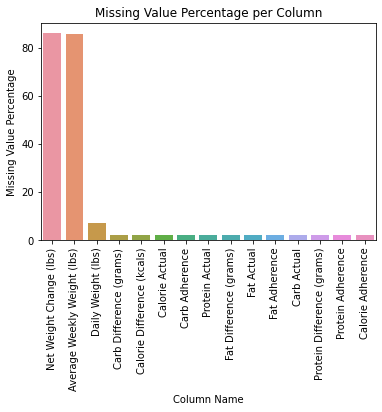

In [75]:
# Visualizing our missing data (percentage)

plot_missing_percent()

In [76]:
# Displaying their missing value counts

missing_value_counts = copy_data.isnull().sum().sort_values(ascending=False)
missing_value_counts[missing_value_counts>0]

Net Weight Change (lbs)        319
Average Weekly Weight (lbs)    318
Daily Weight (lbs)              27
Carb Difference (grams)          8
Calorie Difference (kcals)       8
Calorie Actual                   8
Carb Adherence                   8
Protein Actual                   8
Fat Difference (grams)           8
Fat Actual                       8
Fat Adherence                    8
Carb Actual                      8
Protein Difference (grams)       8
Protein Adherence                8
Calorie Adherence                8
dtype: int64

### Filling Net Weight Change and Average Weekly Weight

As we can see above, the two columns we created as averages for each week (Net Weight Change and Average Weekly Weight) contain the most missing data. This makes sense because those columns only contain one value for every 7 rows (7 consecutive dates).  
<br>
As we suggested earlier, we can use backfill propagation to fill the other missing values for each week with the calculated end-of-week average but this probably wouldn't be ideal for our visualization. If we filled the values that way, our final visualizations would have horizontal lines in each week indicating the average weekly values rather than a single point indicating that value for each week.  
<br>
Furthermore, if used backfill propagation on our Net Weight Change column it would fill the first 7 rows as well which should actually remain as NaN because we don't have the necessary data to complete those calculations.  
<br>
Since roughly 85% of values from these two columns are missing, and using backfill propagation would cause our final visualizations to look unappealing (and generally inaccurate), it would be a better idea to split those columns out into their own DataFrame partitioned by weeks (like we did when creating them). This way, the missing data in both DataFrames is drastically reduced and by keeping the Date column, we will always be able to merge the frames back together if we need to.
<br>  
Let's split them into their own DataFrame now.

In [77]:
# Actually rather than splitting those columns out of copy_data, we still have our partitioned DataFrames that we created before
# So let's just merge those on the shared 'Date' column to get the same result

# Taking a look at the DataFrame for Average Weekly Weight
partitioned_weight_df.head()

,Date,Average Weekly Weight (lbs)
0,2021-01-03,172.000000
1,2021-01-10,171.971429
2,2021-01-17,171.714286
3,2021-01-24,172.133333
4,2021-01-31,171.085714


In [78]:
# Taking a look at the DataFrame for Net Weight Change
partitioned_net_df.head()

,Date,Net Weight Change (lbs)
0,2021-01-03,NaN
1,2021-01-10,-0.029
2,2021-01-17,-0.257
3,2021-01-24,0.419
4,2021-01-31,-1.048


In [79]:
# Verifying that they share the same length
len(partitioned_weight_df) == len(partitioned_net_df)

True

In [80]:
# Verifying that the values of their 'Date' columns are the same
(partitioned_weight_df['Date'] == partitioned_net_df['Date']).value_counts()

True    53
Name: Date, dtype: int64

In [81]:
# Great let's merge

weekly_data = partitioned_weight_df.merge(partitioned_net_df, how='left', on='Date')
weekly_data.head()

,Date,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2021-01-03,172.000000,NaN
1,2021-01-10,171.971429,-0.029
2,2021-01-17,171.714286,-0.257
3,2021-01-24,172.133333,0.419
4,2021-01-31,171.085714,-1.048


In [82]:
# Since we took these from the partitioned copy DataFrames we need to round the values to two decimal places again

weekly_data['Average Weekly Weight (lbs)'] = weekly_data['Average Weekly Weight (lbs)'].round(decimals=2)
weekly_data['Net Weight Change (lbs)'] = weekly_data['Net Weight Change (lbs)'].round(decimals=2)

In [83]:
weekly_data.head()

,Date,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2021-01-03,172.00,NaN
1,2021-01-10,171.97,-0.03
2,2021-01-17,171.71,-0.26
3,2021-01-24,172.13,0.42
4,2021-01-31,171.09,-1.05


In [84]:
# Let's quickly check how much data is missing from this frame
weekly_data.isnull().sum()

Date                           0
Average Weekly Weight (lbs)    0
Net Weight Change (lbs)        1
dtype: int64

In [85]:
# As to be expected, the only missing value is in the first row of Net Weight Change since it has no prior week to calculate
# the difference. Let's fill this value with 0 (although somewhat inaccurate, it is probably alright to do this in the absence
# of prior data)

weekly_data['Net Weight Change (lbs)'].fillna(0, inplace=True)

In [86]:
weekly_data.head() # All values in the first row are filled now

,Date,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2021-01-03,172.00,0.00
1,2021-01-10,171.97,-0.03
2,2021-01-17,171.71,-0.26
3,2021-01-24,172.13,0.42
4,2021-01-31,171.09,-1.05


In [87]:
# Double checking the missing value counts per column
weekly_data.isnull().sum()

# No more missing data - great!

Date                           0
Average Weekly Weight (lbs)    0
Net Weight Change (lbs)        0
dtype: int64

In [88]:
# Now that we have this DataFrame for weekly aggregate data, let's drop the two corresponding columns from copy_data

copy_data = copy_data.drop(columns=['Average Weekly Weight (lbs)', 'Net Weight Change (lbs)'])

In [89]:
copy_data.head() # The two weekly aggregate columns are gone

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0


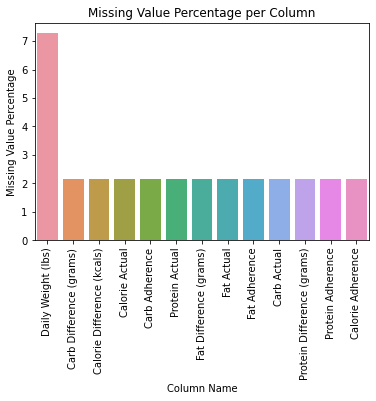

In [90]:
# Let's visualize our remaining missing data and continue
plot_missing_percent()

### A Decision on Daily Weight

In [91]:
# Count of missing values in Daily Weight (lbs) column
copy_data['Daily Weight (lbs)'].isnull().sum()

27

Initally, our plan was to fill the missing values in this column with the calculated Average Weekly Weights. That would have required us to backfill propagate those values and fill when necessary. We suggested that as the best course of action as to not mess up the calculation of those values when doing our Feature Engineering. However, now that we have successfully calculated those values and created a separate deep copy DataFrame to store them, we aren't necessarily confined to that decision.  
<br>
It would also be nice to have some sort of average trend weight calculation in our copy_data frame which can be used to get a general idea on how the client's "true" weight is changing over time (regardless of what day we "start" the week on).  
<br>
To accomplish this, we can use pandas ```.rolling()``` method to create a new column in copy_data which averages the past 7 daily bodyweights. This calcuation wouldn't be significantly affected by missing data since it needs a minimum of 1 recorded weight in the last 7 days to produce a calculation. Let's create that trend weight column and use it to fill the missing values in our Daily Weight (lbs) column.  
<br>
As a rolling average calculation, this won't disrupt the long-term trend in our data and it also won't mess up our weekly aggregate data since that was already calculated and stored in a separate DataFrame.

### Creating a Trend Weight column

In [92]:
copy_data['Trend Weight (lbs)'] = (copy_data['Daily Weight (lbs)']\
                                             .rolling(window=7,min_periods=1)\
                                             .mean()).round(decimals=2)

copy_data[['Date','Daily Weight (lbs)','Trend Weight (lbs)']].head(10)

# Although we ideally want this column to represent the average of the past 7 recorded bodyweights, we set min_periods in the
# .rolling() method to 1 instead of 7 so the first 6 rows can still contain some value (although it wouldn't be completely
# accurate without prior data). The column creation seems to be a success though!

,Date,Daily Weight (lbs),Trend Weight (lbs)
0,2020-12-28,171.4,171.40
1,2020-12-29,170.8,171.10
2,2020-12-30,172.4,171.53
3,2020-12-31,171.4,171.50
4,2021-01-01,173.2,171.84
5,2021-01-02,172.4,171.93
6,2021-01-03,172.4,172.00
7,2021-01-04,173.2,172.26
8,2021-01-05,173.2,172.60
9,2021-01-06,171.6,172.49


### Filling Daily Weight

Now that we have a Trend Weight column, we can use those values to fill our missing values in the Daily Weight column.

In [93]:
# Displaying the rows that contain missing values for the Daily Weight column

copy_data[['Date','Daily Weight (lbs)','Trend Weight (lbs)']][copy_data['Daily Weight (lbs)'].isnull()]

# We can see that every row that has a missing value for Daily Weight does have a numeric value in the Trend Weight column.
# All that's left to do is copy them over.

,Date,Daily Weight (lbs),Trend Weight (lbs)
21,2021-01-18,NaN,171.87
36,2021-02-02,NaN,171.13
62,2021-02-28,NaN,168.10
64,2021-03-02,NaN,168.36
65,2021-03-03,NaN,168.35
69,2021-03-07,NaN,168.20
103,2021-04-10,NaN,161.73
106,2021-04-13,NaN,161.20
112,2021-04-19,NaN,160.80
134,2021-05-11,NaN,158.50


In [94]:
# Whenever the value of the Daily Weight column is missing, fill it with the value of the Trend Weight column

copy_data['Daily Weight (lbs)'].fillna(copy_data['Trend Weight (lbs)'], inplace=True)

In [95]:
# Checking how many values are missing from the Daily Weight column now

copy_data['Daily Weight (lbs)'].isnull().sum() # Look's like it worked

0

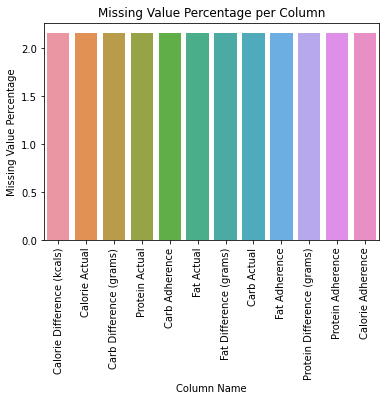

In [96]:
plot_missing_percent() # The Daily Weight column is no longer here!

### Filling Calorie Difference

In [97]:
# Before our Feature Engineering, Calorie/Protein/Fat/Carb Actual all contained missing values. It makes sense that their
# respective Adherence and Difference columns contain the same amount of missing data since the Actual amounts were used in
# their calculations.

# Just to be safe let's look at their missing value counts.
copy_data.isnull().sum()[copy_data.isnull().sum()>0] # They all have 8 missing values

Calorie Actual                8
Protein Actual                8
Fat Actual                    8
Carb Actual                   8
Calorie Adherence             8
Calorie Difference (kcals)    8
Protein Adherence             8
Protein Difference (grams)    8
Fat Adherence                 8
Fat Difference (grams)        8
Carb Adherence                8
Carb Difference (grams)       8
dtype: int64

In [98]:
# Let's look at their rows in our DataFrame to confirm

copy_data[copy_data['Calorie Actual'].isnull()]

# As we can see, all our remaining missing data is located in the same rows

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams),Trend Weight (lbs)
48,2021-02-14,170.80,NaN,1730.0,NaN,183.0,NaN,46.0,NaN,146.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.11
164,2021-06-10,152.90,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.90
165,2021-06-11,153.00,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.00
166,2021-06-12,153.00,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.00
167,2021-06-13,153.00,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.00
208,2021-07-24,149.90,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.90
209,2021-07-25,149.84,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,Walk,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.84
216,2021-08-01,151.60,NaN,1318.0,NaN,165.0,NaN,18.0,NaN,124.0,Walk,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.31


Since the missing data in the Adherence and Difference columns are due to missing data in the Actual columns, we should think about filling the Actual columns first.  
<br>
Although the missing data in these rows only account for about 2% of our total data, we don't want to drop these rows either since they contain values for other important columns like Daily Weight and Activity.
<br>
Similar to how we initally approached filling missing values in the Daily Bodyweight (lbs) column, since these rows are not grouped in chunks of consecutive dates > 7 and we know that nutrition goals remain the same within the week, we can calculate the average consumption for each Actual column and fill the missing values accordingly. To do this, we would likely need to create 4 new columns with the average consumption for each nutrient, use backfill propagation to fill values for every row, then copy those values over to the missing data in the Actual columns.  
<br>
It would have made more sense to do this filling process before Feature Engineering the columns for Adherence and Difference.  
<br>
However, if our end goal is simply visualization and not passing this data into a Machine Learning model, it may be acceptable to leave this small amount of missing data as popular visualization tools such as Tableau and PowerBI are able to display the null values. If someone did want to use this data in a ML model, the ML Engineer could make the decision to fill this small amount of data or drop the rows depending on the task at hand.

## Recasting Remaining Data Types

Although we have a small amount of missing data in our Actual, Adherence, and Difference nutrition columns, we were able to fill the missing data in some of our other columns that we planned on dtype recasting. Now we can go back on change those columns data types to what we originally intended.

In [99]:
# Taking a look at our DataFrame head
copy_data.head()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams),Trend Weight (lbs)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0,171.40
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0,171.10
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0,171.53
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0,171.50
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0,171.84


In [100]:
# Looking at our column data types
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 370
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        371 non-null    datetime64[ns]
 1   Daily Weight (lbs)          371 non-null    float64       
 2   Calorie Actual              363 non-null    float64       
 3   Calorie Goal                371 non-null    float64       
 4   Protein Actual              363 non-null    float64       
 5   Protein Goal                371 non-null    float64       
 6   Fat Actual                  363 non-null    float64       
 7   Fat Goal                    371 non-null    float64       
 8   Carb Actual                 363 non-null    float64       
 9   Carb Goal                   371 non-null    float64       
 10  Activity                    371 non-null    object        
 11  Duration (minutes)          371 non-null    float64       

In [101]:
# Calorie Goal : float --> int
copy_data['Calorie Goal'] = copy_data['Calorie Goal'].astype('int')

In [102]:
# Protein Goal : float --> int
copy_data['Protein Goal'] = copy_data['Protein Goal'].astype('int')

In [103]:
# Fat Goal : float --> int
copy_data['Fat Goal'] = copy_data['Fat Goal'].astype('int')

In [104]:
# Carb Goal : float --> int
copy_data['Carb Goal'] = copy_data['Carb Goal'].astype('int')

In [105]:
# Duration : float --> int
copy_data['Duration (minutes)'] = copy_data['Duration (minutes)'].astype('int')

In [106]:
# Final check of our column data types
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 370
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        371 non-null    datetime64[ns]
 1   Daily Weight (lbs)          371 non-null    float64       
 2   Calorie Actual              363 non-null    float64       
 3   Calorie Goal                371 non-null    int32         
 4   Protein Actual              363 non-null    float64       
 5   Protein Goal                371 non-null    int32         
 6   Fat Actual                  363 non-null    float64       
 7   Fat Goal                    371 non-null    int32         
 8   Carb Actual                 363 non-null    float64       
 9   Carb Goal                   371 non-null    int32         
 10  Activity                    371 non-null    object        
 11  Duration (minutes)          371 non-null    int32         

In [107]:
# calling .info() on our aggregated weekly_data DataFrame
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         53 non-null     datetime64[ns]
 1   Average Weekly Weight (lbs)  53 non-null     float64       
 2   Net Weight Change (lbs)      53 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.7 KB


# Saving our Final Data Frames

We now have two cleaned and feature engineered data frames that are ready for visualization.

In [108]:
# Taking one last look at the head of our copy_data dataframe
copy_data.head()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams),Trend Weight (lbs)
0,2020-12-28,171.4,2011.0,2050,171.0,200,36.0,50,162.0,200,None,0,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0,171.40
1,2020-12-29,170.8,1897.0,2050,188.0,200,32.0,50,232.0,200,None,0,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0,171.10
2,2020-12-30,172.4,2064.0,2050,177.0,200,77.0,50,161.0,200,None,0,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0,171.53
3,2020-12-31,171.4,2178.0,2050,119.0,200,79.0,50,238.0,200,None,0,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0,171.50
4,2021-01-01,173.2,2015.0,2050,179.0,200,31.0,50,208.0,200,None,0,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0,171.84


In [109]:
# Taking a final look at our weekly_data dataframe
weekly_data.head() # Look's good

,Date,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2021-01-03,172.00,0.00
1,2021-01-10,171.97,-0.03
2,2021-01-17,171.71,-0.26
3,2021-01-24,172.13,0.42
4,2021-01-31,171.09,-1.05


In [110]:
# Saving copy_data
copy_data.to_csv('2021_Nutrition_Data_CLEAN_Pandas.csv', index=False, encoding='utf-8')

In [111]:
# Saving weekly_data
copy_data.to_csv('2021_Nutrition_Data_WeeklyAgg.csv', index=False, encoding='utf-8')